## DEPLOYMENT
Deploying a model is basically exchanging of data i.e., we accept an input data in some form (JSON/XML etc), process it through our model and in turn give out the result data

<b>This notebook is a step-by-step, end-to-end process of a model deployment. This notebook covers steps to create an actual model, create a Flask API, developing front-end and deployment to the web. </b>

Following this notebook will ensure the deployment of any working model onto the web

## Step 1: Create a basic model to deploy 

* Using Iris dataset (very common) in this case. It is a binary classification dataset with 4 features and 1 target variable. 
* Here I'm creating a simple model. Remember this notebook focuses more on model deployment and not the actual model.
* Here's the Kaggle link: <a>https://www.kaggle.com/uciml/iris/download</a>

In [1]:
#Import basic libraries
import numpy as np
import pandas as pd

In [2]:
#Load the data
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Separate the features from labels
X = df.drop(['Id','Species'],axis=1)
y = df['Species']

In [4]:
#Since model cannot take in text data, we encode the y variable
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [5]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [6]:
#Scale the dataset (Remember to only fit it on the train set so that we don't acquire any prior knowledge about the test set)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_X_train = scaler.fit_transform(X_train)
sc_X_test = scaler.transform(X_test)

In [7]:
#Create the model (Here a deep learning model is created. Any ML model will work just fine)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(4,activation='relu', input_shape=[4,]))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
#Train and fit the model
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5)
model.fit(sc_X_train, y_train, epochs=400,validation_data=(sc_X_test,y_test), callbacks =[es])

Epoch 1/400
4/4 [==============================] - 5s 687ms/step - loss: 1.2322 - accuracy: 0.3420 - val_loss: 1.2323 - val_accuracy: 0.2895
Epoch 2/400
4/4 [==============================] - 0s 21ms/step - loss: 1.2445 - accuracy: 0.3284 - val_loss: 1.2225 - val_accuracy: 0.2895
Epoch 3/400
4/4 [==============================] - 0s 23ms/step - loss: 1.2168 - accuracy: 0.3368 - val_loss: 1.2139 - val_accuracy: 0.2895
Epoch 4/400
4/4 [==============================] - 0s 22ms/step - loss: 1.2016 - accuracy: 0.3420 - val_loss: 1.2054 - val_accuracy: 0.2895
Epoch 5/400
4/4 [==============================] - 0s 21ms/step - loss: 1.2043 - accuracy: 0.3274 - val_loss: 1.1973 - val_accuracy: 0.2895
Epoch 6/400
4/4 [==============================] - 0s 21ms/step - loss: 1.1991 - accuracy: 0.3330 - val_loss: 1.1897 - val_accuracy: 0.2895
Epoch 7/400
4/4 [==============================] - 0s 20ms/step - loss: 1.2198 - accuracy: 0.2810 - val_loss: 1.1824 - val_accuracy: 0.2895
Epoch 8/400
4/4 [==

4/4 [==============================] - 0s 19ms/step - loss: 1.0747 - accuracy: 0.3295 - val_loss: 1.0738 - val_accuracy: 0.2895
Epoch 60/400
4/4 [==============================] - 0s 18ms/step - loss: 1.0690 - accuracy: 0.3232 - val_loss: 1.0731 - val_accuracy: 0.2895
Epoch 61/400
4/4 [==============================] - 0s 20ms/step - loss: 1.0682 - accuracy: 0.3545 - val_loss: 1.0725 - val_accuracy: 0.2895
Epoch 62/400
4/4 [==============================] - 0s 20ms/step - loss: 1.0738 - accuracy: 0.3180 - val_loss: 1.0718 - val_accuracy: 0.2895
Epoch 63/400
4/4 [==============================] - 0s 21ms/step - loss: 1.0732 - accuracy: 0.2993 - val_loss: 1.0711 - val_accuracy: 0.2895
Epoch 64/400
4/4 [==============================] - 0s 25ms/step - loss: 1.0655 - accuracy: 0.3305 - val_loss: 1.0704 - val_accuracy: 0.2895
Epoch 65/400
4/4 [==============================] - 0s 21ms/step - loss: 1.0640 - accuracy: 0.3451 - val_loss: 1.0698 - val_accuracy: 0.2895
Epoch 66/400
4/4 [========

4/4 [==============================] - 0s 20ms/step - loss: 1.0134 - accuracy: 0.3711 - val_loss: 1.0205 - val_accuracy: 0.2895
Epoch 118/400
4/4 [==============================] - 0s 19ms/step - loss: 1.0112 - accuracy: 0.4045 - val_loss: 1.0192 - val_accuracy: 0.3947
Epoch 119/400
4/4 [==============================] - 0s 24ms/step - loss: 1.0134 - accuracy: 0.4908 - val_loss: 1.0178 - val_accuracy: 0.4211
Epoch 120/400
4/4 [==============================] - 0s 21ms/step - loss: 1.0111 - accuracy: 0.4949 - val_loss: 1.0164 - val_accuracy: 0.4211
Epoch 121/400
4/4 [==============================] - 0s 20ms/step - loss: 1.0216 - accuracy: 0.4552 - val_loss: 1.0150 - val_accuracy: 0.4211
Epoch 122/400
4/4 [==============================] - 0s 20ms/step - loss: 1.0116 - accuracy: 0.5307 - val_loss: 1.0138 - val_accuracy: 0.4474
Epoch 123/400
4/4 [==============================] - 0s 19ms/step - loss: 1.0044 - accuracy: 0.5577 - val_loss: 1.0125 - val_accuracy: 0.4474
Epoch 124/400
4/4 [=

Epoch 175/400
4/4 [==============================] - 0s 24ms/step - loss: 0.9253 - accuracy: 0.6417 - val_loss: 0.9218 - val_accuracy: 0.6579
Epoch 176/400
4/4 [==============================] - 0s 24ms/step - loss: 0.9177 - accuracy: 0.6490 - val_loss: 0.9198 - val_accuracy: 0.6579
Epoch 177/400
4/4 [==============================] - 0s 22ms/step - loss: 0.9236 - accuracy: 0.6240 - val_loss: 0.9178 - val_accuracy: 0.6579
Epoch 178/400
4/4 [==============================] - 0s 21ms/step - loss: 0.9233 - accuracy: 0.6021 - val_loss: 0.9157 - val_accuracy: 0.6579
Epoch 179/400
4/4 [==============================] - 0s 20ms/step - loss: 0.9228 - accuracy: 0.6094 - val_loss: 0.9137 - val_accuracy: 0.6579
Epoch 180/400
4/4 [==============================] - 0s 20ms/step - loss: 0.9149 - accuracy: 0.6562 - val_loss: 0.9117 - val_accuracy: 0.6579
Epoch 181/400
4/4 [==============================] - 0s 20ms/step - loss: 0.9126 - accuracy: 0.6385 - val_loss: 0.9096 - val_accuracy: 0.6579
Epoch 

Epoch 233/400
4/4 [==============================] - 0s 32ms/step - loss: 0.8115 - accuracy: 0.4513 - val_loss: 0.7967 - val_accuracy: 0.5000
Epoch 234/400
4/4 [==============================] - 0s 33ms/step - loss: 0.8071 - accuracy: 0.4390 - val_loss: 0.7945 - val_accuracy: 0.5000
Epoch 235/400
4/4 [==============================] - 0s 24ms/step - loss: 0.8046 - accuracy: 0.4551 - val_loss: 0.7923 - val_accuracy: 0.5000
Epoch 236/400
4/4 [==============================] - 0s 22ms/step - loss: 0.8033 - accuracy: 0.4832 - val_loss: 0.7903 - val_accuracy: 0.5000
Epoch 237/400
4/4 [==============================] - 0s 27ms/step - loss: 0.8040 - accuracy: 0.4659 - val_loss: 0.7882 - val_accuracy: 0.4737
Epoch 238/400
4/4 [==============================] - 0s 24ms/step - loss: 0.8002 - accuracy: 0.4738 - val_loss: 0.7859 - val_accuracy: 0.4474
Epoch 239/400
4/4 [==============================] - 0s 24ms/step - loss: 0.7961 - accuracy: 0.5223 - val_loss: 0.7838 - val_accuracy: 0.5263
Epoch 

Epoch 291/400
4/4 [==============================] - 0s 21ms/step - loss: 0.7102 - accuracy: 0.6690 - val_loss: 0.6905 - val_accuracy: 0.7105
Epoch 292/400
4/4 [==============================] - 0s 21ms/step - loss: 0.7119 - accuracy: 0.6534 - val_loss: 0.6891 - val_accuracy: 0.7105
Epoch 293/400
4/4 [==============================] - 0s 21ms/step - loss: 0.7115 - accuracy: 0.6607 - val_loss: 0.6874 - val_accuracy: 0.7105
Epoch 294/400
4/4 [==============================] - 0s 23ms/step - loss: 0.7126 - accuracy: 0.6368 - val_loss: 0.6860 - val_accuracy: 0.7105
Epoch 295/400
4/4 [==============================] - 0s 20ms/step - loss: 0.7037 - accuracy: 0.6701 - val_loss: 0.6844 - val_accuracy: 0.7105
Epoch 296/400
4/4 [==============================] - 0s 20ms/step - loss: 0.7086 - accuracy: 0.6482 - val_loss: 0.6829 - val_accuracy: 0.7105
Epoch 297/400
4/4 [==============================] - 0s 22ms/step - loss: 0.7079 - accuracy: 0.6409 - val_loss: 0.6814 - val_accuracy: 0.7105
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 19ms/step - loss: 0.6490 - accuracy: 0.6424 - val_loss: 0.6125 - val_accuracy: 0.7105
Epoch 350/400
4/4 [==============================] - 0s 19ms/step - loss: 0.6534 - accuracy: 0.6393 - val_loss: 0.6112 - val_accuracy: 0.7105
Epoch 351/400
4/4 [==============================] - 0s 19ms/step - loss: 0.6490 - accuracy: 0.6382 - val_loss: 0.6101 - val_accuracy: 0.7105
Epoch 352/400
4/4 [==============================] - 0s 21ms/step - loss: 0.6393 - accuracy: 0.6570 - val_loss: 0.6089 - val_accuracy: 0.7105
Epoch 353/400
4/4 [==============================] - 0s 21ms/step - loss: 0.6378 - accuracy: 0.6674 - val_loss: 0.6078 - val_accuracy: 0.7105
Epoch 354/400
4/4 [==============================] - 0s 22ms/step - loss: 0.6577 - accuracy: 0.6007 - val_loss: 0.6068 - val_accuracy: 0.7105
Epoch 355/400
4/4 [==============================] - 0s 21ms/step - loss: 0.6386 - accuracy: 0.6695 - val_loss: 0.6056 - val_accuracy: 0.7105
Epoch 

In [9]:
#Check how it performed

metrics = pd.DataFrame(model.history.history)

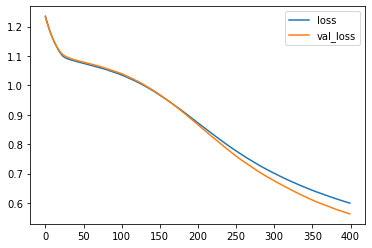

In [10]:
#Plot the losses
metrics[['loss','val_loss']].plot()

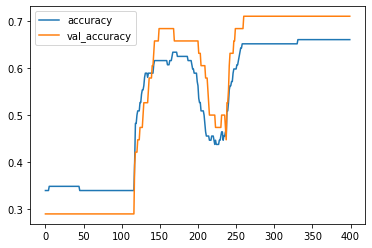

In [11]:
#Plot the accuracy
metrics[['accuracy','val_accuracy']].plot()

### Step 2: Check if the model and it's metrics are satisfactory. Alter the previous steps incase it isn't but if it is okay, finalize the model for deployment

* In the production, there lies no concept of train test split. We used it to determine the best working model.
* When the model is ready to be productionized, it is best to retrain on ALL THE DATA.

In [12]:
epochs = len(metrics) #No of epochs set to the metrics variable length
sc_X = scaler.fit_transform(X) #Scaling the entire data

In [13]:
model = Sequential()
model.add(Dense(4,activation='relu', input_shape=[4,]))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(sc_X, y, epochs=epochs,validation_data=(sc_X_test,y_test), callbacks =[es]) #Now the model is fit on the entire dataset

Epoch 1/400
5/5 [==============================] - 1s 81ms/step - loss: 1.2344 - accuracy: 0.3342 - val_loss: 1.2266 - val_accuracy: 0.3947
Epoch 2/400
5/5 [==============================] - 0s 19ms/step - loss: 1.2425 - accuracy: 0.3038 - val_loss: 1.2193 - val_accuracy: 0.3947
Epoch 3/400
5/5 [==============================] - 0s 17ms/step - loss: 1.2339 - accuracy: 0.3281 - val_loss: 1.2124 - val_accuracy: 0.3947
Epoch 4/400
5/5 [==============================] - 0s 16ms/step - loss: 1.2196 - accuracy: 0.3272 - val_loss: 1.2060 - val_accuracy: 0.3947
Epoch 5/400
5/5 [==============================] - 0s 16ms/step - loss: 1.2075 - accuracy: 0.3194 - val_loss: 1.2002 - val_accuracy: 0.3947
Epoch 6/400
5/5 [==============================] - 0s 15ms/step - loss: 1.1966 - accuracy: 0.3285 - val_loss: 1.1948 - val_accuracy: 0.3947
Epoch 7/400
5/5 [==============================] - 0s 17ms/step - loss: 1.1864 - accuracy: 0.3641 - val_loss: 1.1898 - val_accuracy: 0.3947
Epoch 8/400
5/5 [===

5/5 [==============================] - 0s 16ms/step - loss: 1.0411 - accuracy: 0.4748 - val_loss: 1.0281 - val_accuracy: 0.5789
Epoch 60/400
5/5 [==============================] - 0s 16ms/step - loss: 1.0372 - accuracy: 0.4863 - val_loss: 1.0237 - val_accuracy: 0.6053
Epoch 61/400
5/5 [==============================] - 0s 15ms/step - loss: 1.0307 - accuracy: 0.5059 - val_loss: 1.0192 - val_accuracy: 0.6053
Epoch 62/400
5/5 [==============================] - 0s 16ms/step - loss: 1.0284 - accuracy: 0.5294 - val_loss: 1.0148 - val_accuracy: 0.6053
Epoch 63/400
5/5 [==============================] - 0s 15ms/step - loss: 1.0195 - accuracy: 0.5521 - val_loss: 1.0104 - val_accuracy: 0.6053
Epoch 64/400
5/5 [==============================] - 0s 16ms/step - loss: 1.0119 - accuracy: 0.5582 - val_loss: 1.0061 - val_accuracy: 0.6316
Epoch 65/400
5/5 [==============================] - 0s 15ms/step - loss: 1.0125 - accuracy: 0.5639 - val_loss: 1.0018 - val_accuracy: 0.6316
Epoch 66/400
5/5 [========

5/5 [==============================] - 0s 17ms/step - loss: 0.7895 - accuracy: 0.6723 - val_loss: 0.7616 - val_accuracy: 0.7105
Epoch 118/400
5/5 [==============================] - 0s 14ms/step - loss: 0.8026 - accuracy: 0.6306 - val_loss: 0.7569 - val_accuracy: 0.7105
Epoch 119/400
5/5 [==============================] - 0s 15ms/step - loss: 0.7760 - accuracy: 0.6840 - val_loss: 0.7523 - val_accuracy: 0.7105
Epoch 120/400
5/5 [==============================] - 0s 15ms/step - loss: 0.7705 - accuracy: 0.6840 - val_loss: 0.7476 - val_accuracy: 0.7105
Epoch 121/400
5/5 [==============================] - 0s 16ms/step - loss: 0.7815 - accuracy: 0.6515 - val_loss: 0.7429 - val_accuracy: 0.7105
Epoch 122/400
5/5 [==============================] - 0s 16ms/step - loss: 0.7678 - accuracy: 0.6801 - val_loss: 0.7383 - val_accuracy: 0.7105
Epoch 123/400
5/5 [==============================] - 0s 16ms/step - loss: 0.7630 - accuracy: 0.6680 - val_loss: 0.7336 - val_accuracy: 0.7105
Epoch 124/400
5/5 [=

Epoch 175/400
5/5 [==============================] - 0s 15ms/step - loss: 0.5894 - accuracy: 0.6733 - val_loss: 0.5449 - val_accuracy: 0.7105
Epoch 176/400
5/5 [==============================] - 0s 18ms/step - loss: 0.5732 - accuracy: 0.7141 - val_loss: 0.5422 - val_accuracy: 0.7105
Epoch 177/400
5/5 [==============================] - 0s 17ms/step - loss: 0.5884 - accuracy: 0.6728 - val_loss: 0.5396 - val_accuracy: 0.7368
Epoch 178/400
5/5 [==============================] - 0s 17ms/step - loss: 0.6068 - accuracy: 0.6590 - val_loss: 0.5371 - val_accuracy: 0.7368
Epoch 179/400
5/5 [==============================] - 0s 16ms/step - loss: 0.5794 - accuracy: 0.7050 - val_loss: 0.5345 - val_accuracy: 0.7368
Epoch 180/400
5/5 [==============================] - 0s 17ms/step - loss: 0.5849 - accuracy: 0.6907 - val_loss: 0.5320 - val_accuracy: 0.7368
Epoch 181/400
5/5 [==============================] - 0s 18ms/step - loss: 0.5781 - accuracy: 0.6925 - val_loss: 0.5295 - val_accuracy: 0.7368
Epoch 

Epoch 233/400
5/5 [==============================] - 0s 16ms/step - loss: 0.5041 - accuracy: 0.7861 - val_loss: 0.4374 - val_accuracy: 0.7895
Epoch 234/400
5/5 [==============================] - 0s 16ms/step - loss: 0.4796 - accuracy: 0.7965 - val_loss: 0.4361 - val_accuracy: 0.7895
Epoch 235/400
5/5 [==============================] - 0s 14ms/step - loss: 0.5073 - accuracy: 0.7653 - val_loss: 0.4348 - val_accuracy: 0.7895
Epoch 236/400
5/5 [==============================] - 0s 17ms/step - loss: 0.5039 - accuracy: 0.7622 - val_loss: 0.4335 - val_accuracy: 0.7895
Epoch 237/400
5/5 [==============================] - 0s 16ms/step - loss: 0.4919 - accuracy: 0.7796 - val_loss: 0.4323 - val_accuracy: 0.7895
Epoch 238/400
5/5 [==============================] - 0s 17ms/step - loss: 0.4752 - accuracy: 0.7731 - val_loss: 0.4310 - val_accuracy: 0.7895
Epoch 239/400
5/5 [==============================] - 0s 16ms/step - loss: 0.4800 - accuracy: 0.7692 - val_loss: 0.4298 - val_accuracy: 0.7895
Epoch 

Epoch 291/400
5/5 [==============================] - 0s 15ms/step - loss: 0.4442 - accuracy: 0.8706 - val_loss: 0.3769 - val_accuracy: 0.9474
Epoch 292/400
5/5 [==============================] - 0s 16ms/step - loss: 0.3891 - accuracy: 0.9158 - val_loss: 0.3760 - val_accuracy: 0.9474
Epoch 293/400
5/5 [==============================] - 0s 16ms/step - loss: 0.4269 - accuracy: 0.8515 - val_loss: 0.3751 - val_accuracy: 0.9474
Epoch 294/400
5/5 [==============================] - 0s 16ms/step - loss: 0.4252 - accuracy: 0.8846 - val_loss: 0.3743 - val_accuracy: 0.9474
Epoch 295/400
5/5 [==============================] - 0s 18ms/step - loss: 0.4154 - accuracy: 0.8920 - val_loss: 0.3734 - val_accuracy: 0.9474
Epoch 296/400
5/5 [==============================] - 0s 20ms/step - loss: 0.4091 - accuracy: 0.9185 - val_loss: 0.3725 - val_accuracy: 0.9474
Epoch 297/400
5/5 [==============================] - 0s 20ms/step - loss: 0.4294 - accuracy: 0.8990 - val_loss: 0.3717 - val_accuracy: 0.9474
Epoch 

Epoch 349/400
5/5 [==============================] - 0s 16ms/step - loss: 0.3594 - accuracy: 0.9531 - val_loss: 0.3303 - val_accuracy: 0.9474
Epoch 350/400
5/5 [==============================] - 0s 15ms/step - loss: 0.3788 - accuracy: 0.9588 - val_loss: 0.3296 - val_accuracy: 0.9474
Epoch 351/400
5/5 [==============================] - 0s 15ms/step - loss: 0.3945 - accuracy: 0.9471 - val_loss: 0.3288 - val_accuracy: 0.9474
Epoch 352/400
5/5 [==============================] - 0s 15ms/step - loss: 0.3667 - accuracy: 0.9666 - val_loss: 0.3281 - val_accuracy: 0.9474
Epoch 353/400
5/5 [==============================] - 0s 15ms/step - loss: 0.3809 - accuracy: 0.9627 - val_loss: 0.3273 - val_accuracy: 0.9474
Epoch 354/400
5/5 [==============================] - 0s 15ms/step - loss: 0.3770 - accuracy: 0.9510 - val_loss: 0.3266 - val_accuracy: 0.9474
Epoch 355/400
5/5 [==============================] - 0s 17ms/step - loss: 0.3827 - accuracy: 0.9445 - val_loss: 0.3258 - val_accuracy: 0.9474
Epoch 

### Step 3: Save the model. Also save the scaler
* In the production environment, we do not have the tool or the facility to scale the new incoming data. So it is best to save the scaler functionality as well.

In [14]:
model.save('FinalModel.h5')

In [15]:
import joblib
joblib.dump(scaler, 'iris_scaler.pkl') #saving the scaler object

['iris_scaler.pkl']

### Step 4: Setting up the code for prediction which is compatible with the API

In [16]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np #Since everything related to prediction is to be under one cell, import the necessary libraries again

load_model = load_model('FinalModel.h5')
load_scaler = joblib.load('iris_scaler.pkl')

def return_prediction(model,scaler,json): #Creating a function to predict the output. This takes in the original model, the scaler and the json data as input parameters
    s_len = example_input["sepal_length"]
    s_wid = example_input["sepal_width"]
    p_len = example_input["petal_length"]
    p_wid = example_input["petal_width"]
    new_flower = [[s_len,s_wid,p_len,p_wid]]
    new_flower = scaler.transform(new_flower)[0]
    class_index = model.predict_classes(new_flower) #Predicting the classes based on the input. However, this will return either 0,1 or 2 and not the actual class names. So setting up the actual class names and indexing it.
    classes = np.array(['setosa','versicolor','virginica'])
    return classes[class_index]

### Step 5: Deploy using a Flask Web App and connect it to a front-end HTML form

* Flask is a python based web application framework.
* It uses python to handle the backend of a web app (our model)
* We can connect to front end components (HTML,JS etc)
* This step focuses on combining the Flask API and the model to a front-end HTML form
* This step ensures that anyone who is non-technical can simply go to this website and fill out the form to see the results

### PLAN OF ACTION

* Create a Flask Web App
* Create necessary HTML files
* Use Flask to create an HTML form and inject into <b>home.html</b> (accept user input and sends to flask app)
* Use Flask to accept the submitted form data
* Use Flask to return the prediction onto <b>prediction.html</b> (returns prediction once the prediction function has done running)

### IMPORTANT NOTE

* To run a flask application, we need to write a python script (.py). I'm not running the script directly on the jupyter notebook because it runs on a web browser and it might conflict with the flask's capabilities. Recommend you to write the script separately on a text editor.
* All the HTML files should be located under a folder called 'template' (all lower). Flask will automatically detect the files only under that folder


<b> BELOW IS THE CODE TEMPLATE FOR FLASK WEB APP AND HTML </b>

```python

#modelflask.py
from flask import Flask, render_template, session, redirect, url_for
import numpy as np
from flask_wtf import FlaskForm
from wtforms import TextField, SubmitField
from tensorflow.keras.models import load_model
import joblib


#Define the prediction function
def return_prediction(model,scaler,json): 
    s_len = example_input["sepal_length"]
    s_wid = example_input["sepal_width"]
    p_len = example_input["petal_length"]
    p_wid = example_input["petal_width"]
    new_flower = [[s_len,s_wid,p_len,p_wid]]
    new_flower = scaler.transform(new_flower)[0]
    class_index = model.predict_classes(new_flower)
    classes = np.array(['setosa','versicolor','virginica'])
    return classes[class_index]

#Initialize the flask app
app = Flask(__name__)
app.config['SECRET_KEY'] = 'mysecretkey'

#Creating a form class and inheriting the FlaskForm which is an inbuilt class
class MyForm(FlaskForm):
    sep_len = TextField("Sepal Length")
    sep_wid = TextField("Sepal Width")
    pet_len = TextField("Petal Length")
    pet_wid = TextField("Petal Width")
    
    submit = SubmitField("Predict Result")
    

#Create a basic route for a home page
@app.route("/", methods=['GET','POST'])
def index():
    form = MyForm()
    if form.validate_on_submit():
        session['sep_len'] = form.sep_len.data
        session['sep_wid'] = form.sep_wid.data
        session['pet_len'] = form.pet_len.data
        session['pet_wid'] = form.pet_wid.data
        
        return redirect(url_for('prediction')) #Upon validation, redirect it to the prediction function ('/prediction')
    return render_template('home.html',form=form) #Returning an html form

#Load the model and the scaler
load_model = load_model('FinalModel.h5')
load_scaler = joblib.load('iris_scaler.pkl')

#Create a routing view for prediction
@app.route("/prediction")
def prediction():
    contents = {}
    contents['sepal_length'] = float(session['sep_len'])
    contents['sepal_width'] = float(session['pet_wid'])
    contents['petal_length'] = float(session['sep_len'])
    contents['petal_width'] = float(session['pet_wid'])
    
    results = return_prediction(load_model, load_scaler, contents) #Store the results from the return_prediction function 
    
    return render_template('prediction.html',results=results) #Returning an html form


if __name__ == '__main__':
    app.run()

```

### Below is the HTML code for home.html and prediction.html

```html
<!--home.html-->
<h2>Enter the flower measurements below</h2>
<form method='POST'>
    {# This hidden_tag is a CSRF security feature. #}
    {{ form.hidden_tag() }}
    {{form.sep_len.label }} {{form.sep_len}}
    <br>
    {{form.sep_wid.label }} {{form.sep_wid}}
    <br>
    {{form.pet_len.label }} {{form.pet_len}}
    <br>
    {{form.pet_wid.label }} {{form.pet_wid}}
    <br>
    {{form.submit()}}
</form>
```

```html
<!--prediction.html-->
<h1>Based on the information given, here's the result</h1>
<ul>
    <li>Sepal Length: {{session['sep_len']}}</li>
    <li>Sepal Width: {{session['sep_wid']}}</li>
    <li>Petal Length: {{session['pet_len']}}</li>
    <li>Petal Width: {{session['pet_wid']}}</li>
</ul>
<h2>The predicted flower class is: {{results}}</h2>
```
    



### Step 6: Deployment to the web

* We have now tested and understood that things work fine locally and it's time to take it to the web.
* There are lots of different services to deploy and host web apps
* Although cloud service providers like MS Azure, AWS, GCP may provide free services to a limit, this time we're using a fully free service from <b>Heroku</b>

### Plan of action

* Create a new folder in your desktop and copy the templates folder, flask script, saved model and scaler files
    * Remember to rename the flask script to app.py
* Go to <a>signup.heroku.com</a> and sign up to the website
* Install the Heroku CLI from <a>devcenter.heroku.com/categories/command-line</a>
    * Heroku CLI requires GIT to be installed in the system. Make sure to have it.
* Open anaconda prompt and naviagte to the newly created folder. Create an environment specifically for this deployment
    * conda create --name envname
* Activate the environment
    * conda activate envname
* Install necessary libraries
    * flask, Flask-WTF, tensorflow, scikit-learn, gunicorn
* Create these libraries into a requirements file and upload it to the server
    * pip freeze > requirements.txt
* Create a process file and save it as <b>Procfile</b>
    * Content of the file *web: gunicorn app:app*
* Go back to Heroku and click on Create New App
    * Give an unique app name
* Choose deployment method as Heroku Git
    * Follow all the command line instructions provided as such
        ```git
        COMMANDS:
        heroku login (browser opens. Login using Heroku creds)
        git init
        heroku git:remote -a nameoftheapp
        git add .
        git commit -am "Enter commit message"
        git push heroku master
        ```
* Your app will now have a dedicated URL which can be launched on the browser and VOILA!
